In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[1.6594095388574706e+38, 'd13c_site1b_08_025.tif'],
       [1.6529369625727547e+38, 'd13c_site1b_08_027.tif'],
       [1.6602810893001001e+38, 'd13c_site1b_09_028.tif'],
       [1.6573536989388792e+38, 'd13c_site1b_09_030.tif'],
       [1.6618314932761932e+38, 'd13c_site1b_12_029.tif'],
       [1.6599985178796327e+38, 'd13c_site1b_12_035.tif'],
       [1.6585096231337364e+38, 'd13c_site1b_14_023.tif'],
       [1.6524582587059443e+38, 'd13c_site1b_14_053.tif'],
       [1.655852646854335e+38, 'd13c_site1b_15_022.tif'],
       [1.6593171276587482e+38, 'd13c_site1b_16_041.tif'],
       [1.6588395847509453e+38, 'd13c_site1b_17_038.tif'],
       [1.6628053282532976e+38, 'd13c_site1b_17_042.tif'],
       [1.656109747350004e+38, 'd13c_site1b_17_043.tif'],
       [1.6606044890187846e+38, 'd13c_site1b_17_045.tif'],
       [1.6635305266212522e+38, 'd13c_site1b_18_048.tif'],
       [1.660097029246953e+38, 'd13c_site1b_18_051.tif'],
       [1.6601530093071304e+38, 'd13c_site1b_19_030.tif'],


In [4]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'E:\wenqu\aviris\single_pixel_clip_tif\combine'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_08_025.tif
site1b_08_027.tif
site1b_09_028.tif
site1b_09_030.tif
site1b_12_029.tif
site1b_12_035.tif
site1b_14_023.tif
site1b_14_053.tif
site1b_15_022.tif
site1b_16_041.tif
site1b_17_038.tif
site1b_17_042.tif
site1b_17_043.tif
site1b_17_045.tif
site1b_18_048.tif
site1b_18_051.tif
site1b_19_030.tif
site1b_19_048.tif
site1b_20_034.tif
site1b_21_036.tif
site1b_22_020.tif
site1b_22_021.tif
site1b_24_024.tif
site1b_24_039.tif
site1b_24_040.tif
site1b_24_058.tif
site1b_25_037.tif
site1b_25_076.tif
site1b_26_028.tif
site1b_26_029.tif
site1b_26_044.tif
site1b_26_045.tif
site1b_26_060.tif
site1b_26_061.tif
site1b_26_062.tif
site1b_27_020.tif
site1b_27_036.tif
site1b_27_041.tif
site1b_28_018.tif
site1b_30_036.tif
site1b_30_082.tif
site1b_30_085.tif
site1b_31_037.tif
site1b_31_040.tif
site1b_32_024.tif
site1b_32_039.tif
site1b_33_043.tif
site1b_33_086.tif
site1b_33_087.tif
site1b_34_028.tif
site1b_34_087.tif
site1b_36_049.tif
site1b_36_092.tif
site1b_37_015.tif
site1b_37_092.tif
site1b_38_

In [5]:
df_spectral = df
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_08_025.tif,0.015530,0.012330,0.013138,0.011487,0.019282,0.016061,0.019116,0.019019,0.022247,...,0.026986,0.027582,0.024639,0.032859,0.026864,0.070102,0.076302,0.054107,0.096432,0.048397
1,site1b_08_027.tif,0.010203,0.011842,0.013479,0.011724,0.019912,0.015466,0.017308,0.019113,0.020695,...,0.058747,0.054097,0.048855,0.045194,0.049291,0.072694,0.098501,0.300149,0.144051,0.066305
2,site1b_09_028.tif,0.006645,0.011930,0.014607,0.014739,0.018153,0.019467,0.021518,0.022907,0.024639,...,0.030415,0.030288,0.032028,0.036514,0.045322,0.043860,0.122543,0.279037,0.081118,0.068412
3,site1b_09_030.tif,-0.001851,0.002005,0.007812,0.005726,0.011073,0.010525,0.013337,0.016856,0.019017,...,0.022529,0.021038,0.026056,0.033581,0.032948,0.045921,0.123889,0.294692,0.107393,0.073712
4,site1b_12_029.tif,0.009582,0.013725,0.018156,0.021375,0.019513,0.022464,0.025571,0.026385,0.027904,...,0.043679,0.045252,0.043406,0.041787,0.047786,0.050504,0.141280,0.258020,0.166465,0.080137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,site6_55_009.tif,0.036976,0.030732,0.027157,0.027013,0.028782,0.029882,0.030916,0.035789,0.036144,...,0.077743,0.075721,0.069707,0.078426,0.067656,0.076694,0.257025,0.334686,0.198551,0.078130
412,site6_55_010.tif,0.017687,0.029311,0.024823,0.025234,0.027849,0.029225,0.030655,0.033508,0.035585,...,0.073891,0.072373,0.068211,0.080692,0.073772,0.087726,0.238959,0.244229,0.108440,0.073833
413,site6_56_008.tif,0.024493,0.032721,0.024011,0.023344,0.028793,0.028631,0.029709,0.033150,0.036126,...,0.073257,0.067961,0.063227,0.068943,0.080177,0.085050,0.200354,0.275683,0.233892,0.099366
414,site6_56_009.tif,0.027422,0.029281,0.031863,0.022390,0.025971,0.030068,0.032959,0.034209,0.036921,...,0.072728,0.069023,0.066231,0.073100,0.070084,0.083366,0.230209,0.336358,0.214847,0.130138


In [6]:
print(df_spectral['filename'])

0      site1b_08_025.tif
1      site1b_08_027.tif
2      site1b_09_028.tif
3      site1b_09_030.tif
4      site1b_12_029.tif
             ...        
411     site6_55_009.tif
412     site6_55_010.tif
413     site6_56_008.tif
414     site6_56_009.tif
415     site6_56_010.tif
Name: filename, Length: 416, dtype: object


In [7]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [8]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [9]:
band_name = np.array(band_name)

In [10]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:80, :]
site2a_x = x_spectra[115:195, :]
site2c_x = x_spectra[230:310,:]
site6_x1 = x_spectra[354:550,:]

x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1))
# site2c_x = x[]
x.shape

(302, 319)

In [11]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_std_d13c.npy',  allow_pickle=True)
y1 = np.array(d13c_trait_pdf_ymax)

In [12]:
len(y1[:, 1])

416

In [13]:
print(y1[:, 1])

['d13c_site1b_08_025.tif' 'd13c_site1b_08_027.tif'
 'd13c_site1b_09_028.tif' 'd13c_site1b_09_030.tif'
 'd13c_site1b_12_029.tif' 'd13c_site1b_12_035.tif'
 'd13c_site1b_14_023.tif' 'd13c_site1b_14_053.tif'
 'd13c_site1b_15_022.tif' 'd13c_site1b_16_041.tif'
 'd13c_site1b_17_038.tif' 'd13c_site1b_17_042.tif'
 'd13c_site1b_17_043.tif' 'd13c_site1b_17_045.tif'
 'd13c_site1b_18_048.tif' 'd13c_site1b_18_051.tif'
 'd13c_site1b_19_030.tif' 'd13c_site1b_19_048.tif'
 'd13c_site1b_20_034.tif' 'd13c_site1b_21_036.tif'
 'd13c_site1b_22_020.tif' 'd13c_site1b_22_021.tif'
 'd13c_site1b_24_024.tif' 'd13c_site1b_24_039.tif'
 'd13c_site1b_24_040.tif' 'd13c_site1b_24_058.tif'
 'd13c_site1b_25_037.tif' 'd13c_site1b_25_076.tif'
 'd13c_site1b_26_028.tif' 'd13c_site1b_26_029.tif'
 'd13c_site1b_26_044.tif' 'd13c_site1b_26_045.tif'
 'd13c_site1b_26_060.tif' 'd13c_site1b_26_061.tif'
 'd13c_site1b_26_062.tif' 'd13c_site1b_27_020.tif'
 'd13c_site1b_27_036.tif' 'd13c_site1b_27_041.tif'
 'd13c_site1b_28_018.tif' 'd13c

In [14]:
labels1 = [] 
for i in range(len(y1[:, 1])):
    substrings = y1[:, 1][i]
    site_name = substrings.split("_")[1]
    labels1.append(site_name)

In [15]:
labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',

In [16]:
site1b_labels1 = labels1[0:80]
site2a_labels1 = labels1[115:195]
site2c_labels1 = labels1[230:310]
site6_labels1_1 = labels1[354:550]
# site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1
len(labels)

302

In [17]:
site1b_labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b']

In [18]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))
    component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
        


        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

    # Create plot of number of components vs. MSE
    fig, ax = plt.subplots()
    ax.plot(range(1, max_comp+1), mse[:, mseminy])
    ax.set_xlabel('Number of PLS components')
    ax.set_ylabel('MSE')
    ax.set_title('Number of PLS components vs. MSE')
    plt.show()
    
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y[:, 0].astype(np.float64))
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [19]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'},
            'site6add': {'marker': '^', 'color': 'red'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [55]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_std_d13c.npy',  allow_pickle=True)

In [56]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [57]:
y_d13c_max1.shape

(416, 2)

In [58]:
y_d13c_max1[0:438, :]

array([[3.0173453513847886e+35, 'd13c_site1b_08_025.tif'],
       [-1.0619623767263242e+35, 'd13c_site1b_08_027.tif'],
       [1.7209431684516087e+35, 'd13c_site1b_09_028.tif'],
       [-1.4409959945452207e+35, 'd13c_site1b_09_030.tif'],
       [-4.954803069822019e+34, 'd13c_site1b_12_029.tif'],
       [-6.22884915604021e+34, 'd13c_site1b_12_035.tif'],
       [1.4762837871560863e+35, 'd13c_site1b_14_023.tif'],
       [-2.7972469256001433e+35, 'd13c_site1b_14_053.tif'],
       [1.277494808194483e+35, 'd13c_site1b_15_022.tif'],
       [-1.962405803337706e+35, 'd13c_site1b_16_041.tif'],
       [-2.6097632400184976e+35, 'd13c_site1b_17_038.tif'],
       [4.753538594100488e+34, 'd13c_site1b_17_042.tif'],
       [2.3944381936121944e+34, 'd13c_site1b_17_043.tif'],
       [9.745773821012946e+34, 'd13c_site1b_17_045.tif'],
       [3.2232164042918805e+35, 'd13c_site1b_18_048.tif'],
       [-6.965035798415984e+34, 'd13c_site1b_18_051.tif'],
       [2.9058795640175657e+35, 'd13c_site1b_19_030.tif'

In [59]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:80, :]
site2a_y_d13c_max1 = y_d13c_max1[115:195, :]
site2c_y_d13c_max1 = y_d13c_max1[230:310,:]
site6_y_d13c_max1_1 = y_d13c_max1[354:550,:]

y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1))
# site2c_x = x[]
y_d13c_max.shape

(302, 2)

In [60]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:80, :]
site2a_y_d13c_std1 = y_d13c_std1[115:195, :]
site2c_y_d13c_std1 = y_d13c_std1[230:310,:]
site6_y_d13c_std1_1 = y_d13c_std1[354:550,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1))
# site2c_x = x[]
y_d13c_std.shape

(302, 2)

(302, 319)
2% completed(302, 319)
4% completed(302, 319)
6% completed(302, 319)
8% completed(302, 319)
10% completed(302, 319)
12% completed(302, 319)
14% completed(302, 319)
16% completed(302, 319)
18% completed(302, 319)
20% completed(302, 319)
22% completed(302, 319)
24% completed(302, 319)
26% completed(302, 319)
28% completed(302, 319)
30% completed(302, 319)
32% completed(302, 319)
34% completed(302, 319)
36% completed(302, 319)
38% completed(302, 319)
40% completed(302, 319)
42% completed(302, 319)
44% completed(302, 319)
46% completed(302, 319)
48% completed(302, 319)
50% completed(302, 319)
52% completed(302, 319)
54% completed(302, 319)
56% completed(302, 319)
58% completed(302, 319)
60% completed(302, 319)
62% completed(302, 319)
64% completed(302, 319)
66% completed(302, 319)
68% completed(302, 319)
70% completed(302, 319)
72% completed(302, 319)
74% completed(302, 319)
76% completed(302, 319)
78% completed(302, 319)
80% completed(302, 319)
82% completed(302, 319)
84% compl

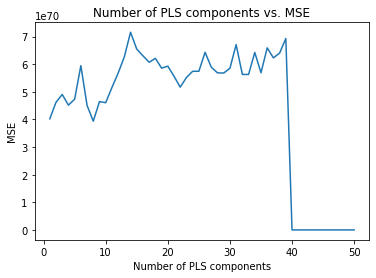

In [61]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 50)


In [47]:
opt_Xc_d13c_max.shape

(302, 0)

In [48]:
x1_d13c_max = opt_Xc_d13c_max[0:80,:]
x2_d13c_max = opt_Xc_d13c_max[80:160,:]
x3_d13c_max = opt_Xc_d13c_max[160:240,:]
x4_d13c_max = opt_Xc_d13c_max[240:550,:]

y1_d13c_max = y_d13c_max[0:80,:]
y2_d13c_max = y_d13c_max[80:160,:]
y3_d13c_max = y_d13c_max[160:240,:]
y4_d13c_max = y_d13c_max[240:550,:]

In [49]:
file_name_d13c_mean = 'E:/wenqu/trait_map/update4/result_csv/d13c_mean_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

ValueError: Found array with 0 feature(s) (shape=(302, 0)) while a minimum of 1 is required by PLSRegression.

In [68]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_d13c_max, y_d13c_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_max][wav_d13c_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(87,) (87,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 1.42753412,  1.83548718, -1.68691525, -1.02823303,  0.09099079,
        2.36405234,  1.37835376, -1.46787295,  1.84169118,  0.03578563,
       -0.07869946,  0.74953737,  0.2227627 ,  1.9300332 ,  0.76296526,
        1.24498702,  0.16410533,  1.52649706, -0.26626444, -2.37326403,
        1.86012121, -2.73350513,  0.78046615, -1.39699241, -0.45064967,
        1.70087494, -1.36709471,  1.13771424,  0.37086461,  2.27592483,
        1.25214014, -0.08641929,  1.05262012, -0.76685121, -1.06994955,
       -1.69523488,  1.83187349,  0.91725659,  0.61797791, -0.98972827,
        0.59418767, -2.51415905,  0.98001149,  1.1147541 , -0.74003334,
       -2.79880484,  1.44438799, -0.16520502, -1.49311727,  2.42102668,
       -1.39880426,  1.18624573, -1.25832113, -2.30270735, -1.88406606,
       -1.05186339,  2.28913079, -1.13417758,  2.759938  , -2.26644779,
        0.5929558 ,  2.72406753, -1.70876071, -2.02393032, -1.54088701,
       -0.07268503, -2.70168686, -1.73491508, -2.39166311, -1.42

In [69]:
optimal_pls_sla.intercept_

array([-28.56475876])

In [71]:
bands_sla

array(['band_112', 'band_334', 'band_360', 'band_336', 'band_20',
       'band_136', 'band_37', 'band_50', 'band_102', 'band_32',
       'band_109', 'band_143', 'band_26', 'band_185', 'band_216',
       'band_365', 'band_384', 'band_60', 'band_231', 'band_359',
       'band_330', 'band_35', 'band_404', 'band_131', 'band_72',
       'band_354', 'band_34', 'band_149', 'band_68', 'band_345',
       'band_157', 'band_176', 'band_390', 'band_108', 'band_327',
       'band_222', 'band_282', 'band_101', 'band_67', 'band_144',
       'band_142', 'band_126', 'band_161', 'band_281', 'band_284',
       'band_52', 'band_96', 'band_54', 'band_79', 'band_381', 'band_376',
       'band_401', 'band_30', 'band_385', 'band_165', 'band_362',
       'band_82', 'band_388', 'band_180', 'band_135', 'band_29',
       'band_104', 'band_379', 'band_363', 'band_62', 'band_148',
       'band_338', 'band_242', 'band_170', 'band_93', 'band_27',
       'band_118', 'band_22', 'band_105', 'band_152', 'band_386',
     

# d13 std

In [30]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

(302, 1)
2% completed(302, 1)
4% completed(302, 1)
6% completed(302, 1)
8% completed(302, 1)
10% completed(302, 1)
12% completed(302, 1)
14% completed(302, 1)
16% completed(302, 1)
18% completed(302, 1)
20% completed(302, 1)
22% completed(302, 1)
24% completed(302, 1)
26% completed(302, 1)
28% completed(302, 1)
30% completed(302, 1)
32% completed(302, 1)
34% completed(302, 1)
36% completed(302, 1)
38% completed(302, 1)
40% completed(302, 1)
42% completed(302, 1)
44% completed(302, 1)
46% completed(302, 1)
48% completed(302, 1)
50% completed(302, 1)
52% completed(302, 1)
54% completed(302, 1)
56% completed(302, 1)
58% completed(302, 1)
60% completed(302, 1)
62% completed(302, 1)
64% completed(302, 1)
66% completed(302, 1)
68% completed(302, 1)
70% completed(302, 1)
72% completed(302, 1)
74% completed(302, 1)
76% completed(302, 1)
78% completed(302, 1)
80% completed(302, 1)
82% completed(302, 1)
84% completed(302, 1)
86% completed(302, 1)
88% completed(302, 1)
90% completed(302, 1)
92% c

ValueError: zero-size array to reduction operation minimum which has no identity

In [29]:
x1_d13c_std = opt_Xc_d13c_std[0:80,:]
x2_d13c_std = opt_Xc_d13c_std[80:160,:]
x3_d13c_std = opt_Xc_d13c_std[160:240,:]
x4_d13c_std = opt_Xc_d13c_std[240:550,:]

y1_d13c_std = y_d13c_std[0:80,:]
y2_d13c_std = y_d13c_std[80:160,:]
y3_d13c_std = y_d13c_std[160:240,:]
y4_d13c_std = y_d13c_std[240:550,:]

R2 calib: 0.822
R2 CV: 0.629
MSE calib: 0.095
MSE CV: 0.199
[0.62239305] [0.7475364]
None
0 site1b [1.95619995] [1.9033167803533657 'd13c_site1b_07_025.tif']
1 site1b [1.9648661] [1.3591808256388924 'd13c_site1b_09_028.tif']
2 site1b [2.09363732] [2.516286739216657 'd13c_site1b_14_053.tif']
3 site1b [1.8787145] [1.3434925144236145 'd13c_site1b_17_025.tif']
4 site1b [1.87044422] [1.6057681065661558 'd13c_site1b_18_046.tif']
5 site1b [2.08753223] [1.2752581304077621 'd13c_site1b_18_048.tif']
6 site1b [1.31823395] [1.389351647895372 'd13c_site1b_18_051.tif']
7 site1b [1.76698555] [1.5086860024906203 'd13c_site1b_19_063.tif']
8 site1b [1.7276051] [1.5131538684600379 'd13c_site1b_21_018.tif']
9 site1b [2.36163228] [1.830340264004015 'd13c_site1b_21_034.tif']
10 site1b [1.84899247] [2.44655854994505 'd13c_site1b_21_052.tif']
11 site1b [2.21236925] [1.5199221926693365 'd13c_site1b_22_035.tif']
12 site1b [2.1543558] [2.3318613323654813 'd13c_site1b_22_037.tif']
13 site1b [1.73548644] [2.308148

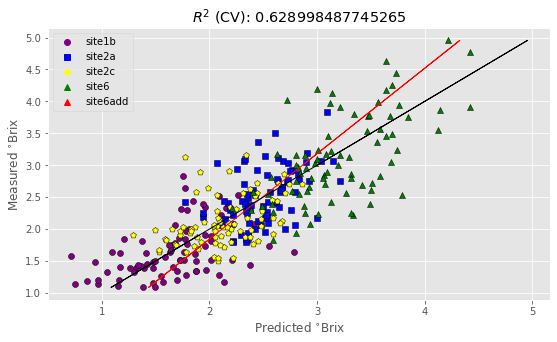

In [30]:
file_name_d13c_std = 'E:/wenqu/trait_map/update4/\result_csv/d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [72]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_std][wav_d13c_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(116,) (116,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.73214358, -0.61010183, -0.59185158,  1.2618977 , -0.80944006,
        0.27881977, -0.56964153,  1.17707114, -0.69450709,  0.95435006,
        0.50185924,  1.09287409, -0.47780769, -0.57409524, -0.58757443,
       -0.15143433, -0.8822081 , -0.18141234,  0.11684824, -0.14416253,
        0.4880669 ,  0.65360086, -0.24954007, -0.22911223,  0.12555155,
       -0.8795858 , -0.22040231,  0.3566614 ,  1.04955144,  0.97497944,
        0.62362969,  0.01486238,  0.90827343,  0.53982229, -0.73106998,
        0.99416333,  0.41110663,  0.04834126,  0.64565191,  0.16868231,
       -0.90643362, -0.6064916 ,  0.63781214, -0.24497442, -0.64112973,
        0.44562809,  0.78424191,  1.00651509,  0.29430474, -0.73613729,
       -0.28693549,  0.6145905 ,  0.70124565,  1.06489837,  0.7560593 ,
       -0.43139993, -0.58577711,  0.18934669, -0.789304  ,  0.38096926,
       -0.34969711, -0.31095514,  0.4387111 , -1.01496148,  0.50866139,
       -1.3471648 , -0.7318409 , -0.71381632,  0.67071464,  0.71

In [73]:
optimal_pls_sla.intercept_

array([2.35080498])

In [74]:
bands_sla

array(['band_127', 'band_93', 'band_19', 'band_330', 'band_357',
       'band_44', 'band_131', 'band_258', 'band_85', 'band_124',
       'band_166', 'band_234', 'band_402', 'band_90', 'band_247',
       'band_26', 'band_249', 'band_270', 'band_60', 'band_55',
       'band_327', 'band_235', 'band_340', 'band_123', 'band_74',
       'band_360', 'band_154', 'band_404', 'band_158', 'band_43',
       'band_108', 'band_391', 'band_137', 'band_353', 'band_265',
       'band_372', 'band_257', 'band_178', 'band_216', 'band_227',
       'band_47', 'band_279', 'band_152', 'band_145', 'band_239',
       'band_260', 'band_378', 'band_53', 'band_400', 'band_274',
       'band_220', 'band_104', 'band_45', 'band_87', 'band_233',
       'band_344', 'band_82', 'band_338', 'band_99', 'band_226',
       'band_89', 'band_36', 'band_138', 'band_384', 'band_229',
       'band_349', 'band_343', 'band_281', 'band_50', 'band_18',
       'band_183', 'band_355', 'band_240', 'band_259', 'band_283',
       'band_36

# d15n

In [20]:
d15n_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update4\training\gaussian_numpy\resampled_std_d15n.npy',  allow_pickle=True)

In [25]:
y_d15n_max1.shape

(416, 2)

In [21]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [22]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:80, :]
site2a_y_d15n_max1 = y_d15n_max1[115:195, :]
site2c_y_d15n_max1 = y_d15n_max1[230:310,:]
site6_y_d15n_max1_1 = y_d15n_max1[354:550,:]

y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1))
# site2c_x = x[]
y_d15n_max.shape

(302, 2)

In [23]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:80, :]
site2a_y_d15n_std1 = y_d15n_std1[115:195, :]
site2c_y_d15n_std1 = y_d15n_std1[230:310,:]
site6_y_d15n_std1_1 = y_d15n_std1[354:550,:]

y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1))
# site2c_x = x[]
y_d15n_std.shape

(302, 2)

(302, 319)
2% completed(302, 319)
4% completed(302, 319)
6% completed(302, 319)
8% completed(302, 319)
10% completed(302, 319)
12% completed(302, 319)
14% completed(302, 319)
16% completed(302, 319)
18% completed(302, 319)
20% completed(302, 319)
22% completed(302, 319)
24% completed(302, 319)
26% completed(302, 319)
28% completed(302, 319)
30% completed(302, 319)
32% completed(302, 319)
34% completed(302, 319)
36% completed(302, 319)
38% completed(302, 319)
40% completed(302, 319)
42% completed(302, 319)
44% completed(302, 319)
46% completed(302, 319)
48% completed(302, 319)
50% completed(302, 319)
52% completed(302, 319)
54% completed(302, 319)
56% completed(302, 319)
58% completed(302, 319)
60% completed(302, 319)
62% completed(302, 319)
64% completed(302, 319)
66% completed(302, 319)
68% completed(302, 319)
70% completed(302, 319)
72% completed(302, 319)
74% completed(302, 319)
76% completed(302, 319)
78% completed(302, 319)
80% completed(302, 319)
82% completed(302, 319)
84% compl

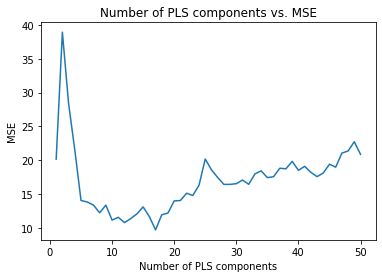

In [24]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:80,:]
x2_d15n_max = opt_Xc_d15n_max[80:160,:]
x3_d15n_max = opt_Xc_d15n_max[160:240,:]
x4_d15n_max = opt_Xc_d15n_max[240:550,:]

y1_d15n_max = y_d15n_max[0:80,:]
y2_d15n_max = y_d15n_max[80:160,:]
y3_d15n_max = y_d15n_max[160:240,:]
y4_d15n_max = y_d15n_max[240:550,:]

R2 calib: 0.761
R2 CV: 0.569
MSE calib: 2.281
MSE CV: 4.113
[-0.88130684] [0.67726005]
None
0 site1b [2.60171866] [6.102876400270883 'd15n_site1b_07_025.tif']
1 site1b [3.52560094] [2.446332524946433 'd15n_site1b_09_028.tif']
2 site1b [-2.52319045] [-4.592603855702791 'd15n_site1b_14_053.tif']
3 site1b [0.00505879] [-1.6877400378617615 'd15n_site1b_17_025.tif']
4 site1b [-5.04754579] [-6.906464004384826 'd15n_site1b_18_046.tif']
5 site1b [-6.43981636] [-5.874480876433182 'd15n_site1b_18_048.tif']
6 site1b [-5.09723179] [-7.056253488557148 'd15n_site1b_18_051.tif']
7 site1b [0.32452548] [-2.8186684493862195 'd15n_site1b_19_063.tif']
8 site1b [3.05904744] [3.3536240605456555 'd15n_site1b_21_018.tif']
9 site1b [0.05841164] [0.3551838935079701 'd15n_site1b_21_034.tif']
10 site1b [-3.98347829] [-4.057412032220057 'd15n_site1b_21_052.tif']
11 site1b [-0.5474806] [-3.1927603069448143 'd15n_site1b_22_035.tif']
12 site1b [-1.72180567] [-4.881114344709372 'd15n_site1b_22_037.tif']
13 site1b [-1.

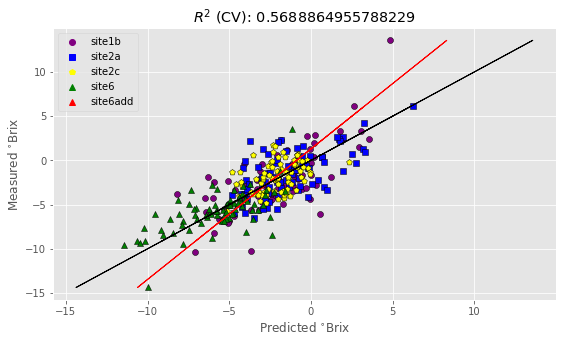

In [36]:
file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

In [89]:
optimal_pls_sla  = PLSRegression(n_components=14)
optimal_pls_sla.fit(opt_Xc_d15n_max, y_d15n_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_max][wav_d15n_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(85,) (85,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ -7.27800869,  -2.80064028,  -6.85744325,   8.10152409,
        -3.91292427,  -2.61366424,   4.1986087 ,  -1.50694232,
         7.63671576,   4.34749602,  -5.03270584,  -0.80723844,
        -4.1500074 ,  -4.91356881,   2.32350545,  -6.94202664,
         2.0729532 ,   5.39048009,   4.46172153,   1.84936338,
         7.94976971,   1.77781817,  -1.89623882,  -1.32278088,
        -7.12255212,   6.50354066,  -0.96020463,   0.50879457,
         2.59141809,  -5.34887872,  -0.45169265,   2.209144  ,
         3.9252243 ,   0.3724526 ,  -4.34323048,   3.67142822,
        -3.86264539,  -6.23174502,  -4.89205716,   6.00865045,
         3.25150349,   3.15612801,  -3.40130027,   5.10618142,
         6.68761684,  -7.39275386,   2.63012237,  -4.13084878,
         2.93664008,  -3.35859811,   2.94807003,  -7.13245777,
        -2.6609029 ,   2.85400669,  -3.89190065,   5.54103705,
         5.56040085,  -4.4981181 ,  -3.39441394,  -6.45798334,
         3.96035169,   6.58104425,  -8.26875643,   4.12

In [90]:
optimal_pls_sla.intercept_

array([-2.84646987])

In [91]:
bands_sla

array(['band_98', 'band_393', 'band_244', 'band_263', 'band_39',
       'band_156', 'band_392', 'band_221', 'band_373', 'band_144',
       'band_97', 'band_391', 'band_41', 'band_166', 'band_364',
       'band_273', 'band_105', 'band_171', 'band_385', 'band_271',
       'band_106', 'band_84', 'band_270', 'band_348', 'band_377',
       'band_229', 'band_29', 'band_398', 'band_376', 'band_67',
       'band_31', 'band_344', 'band_87', 'band_337', 'band_45', 'band_26',
       'band_142', 'band_334', 'band_272', 'band_173', 'band_228',
       'band_372', 'band_127', 'band_160', 'band_50', 'band_255',
       'band_400', 'band_38', 'band_62', 'band_63', 'band_403',
       'band_266', 'band_104', 'band_220', 'band_43', 'band_95',
       'band_218', 'band_401', 'band_110', 'band_395', 'band_237',
       'band_278', 'band_354', 'band_145', 'band_18', 'band_262',
       'band_283', 'band_65', 'band_30', 'band_338', 'band_216',
       'band_35', 'band_25', 'band_394', 'band_32', 'band_148',
      

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  275
Optimised MSEP  1.2548956799407953



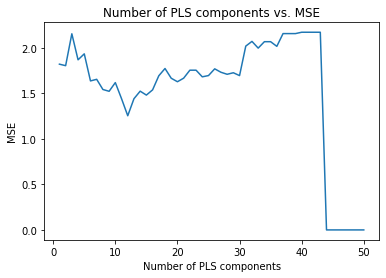

R2 calib: 0.569
R2 CV: 0.343
MSE calib: 0.741
MSE CV: 1.130
[2.41332298] [0.44948878]
None
0 site1b [6.12052366] [5.4415493365888885 'd15n_site1b_07_025.tif']
1 site1b [3.12101389] [2.7581499691703524 'd15n_site1b_09_028.tif']
2 site1b [6.93637804] [4.8935152057219256 'd15n_site1b_14_053.tif']
3 site1b [2.97661819] [2.8051469311766226 'd15n_site1b_17_025.tif']
4 site1b [4.4678313] [4.069376836763759 'd15n_site1b_18_046.tif']
5 site1b [4.8332388] [3.314505804857247 'd15n_site1b_18_048.tif']
6 site1b [3.994314] [3.9097907862521137 'd15n_site1b_18_051.tif']
7 site1b [5.14116949] [4.795221642024605 'd15n_site1b_19_063.tif']
8 site1b [3.57148729] [3.4772804387235405 'd15n_site1b_21_018.tif']
9 site1b [4.44597715] [5.921461620632114 'd15n_site1b_21_034.tif']
10 site1b [4.80294688] [4.016250189784192 'd15n_site1b_21_052.tif']
11 site1b [3.83238109] [3.5723938530913038 'd15n_site1b_22_035.tif']
12 site1b [4.93355805] [5.49110288180491 'd15n_site1b_22_037.tif']
13 site1b [4.38317041] [5.3307727

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66 site1b [4.53188634] [3.9405305148012006 'd15n_site1b_51_061.tif']
67 site1b [3.36670653] [3.5358633103434864 'd15n_site1b_51_075.tif']
68 site1b [4.38390278] [3.860879880446136 'd15n_site1b_52_044.tif']
69 site1b [3.3813538] [2.421172072005683 'd15n_site1b_53_065.tif']
70 site1b [4.19078442] [6.072533686065824 'd15n_site1b_53_078.tif']
71 site1b [2.96365897] [3.946092806641279 'd15n_site1b_54_048.tif']
72 site1b [2.43269828] [2.9067889965952505 'd15n_site1b_54_065.tif']
73 site1b [2.43269828] [2.627447884411505 'd15n_site1b_54_066.tif']
74 site1b [4.2502025] [5.444236050373257 'd15n_site1b_54_089.tif']
75 site1b [3.47177834] [6.111915920123073 'd15n_site1b_54_090.tif']
76 site1b [3.81745467] [2.992228281825124 'd15n_site1b_55_066.tif']
77 site1b [3.32196452] [3.02032398075098 'd15n_site1b_56_067.tif']
78 site1b [2.94654855] [2.8533761845509233 'd15n_site1b_57_070.tif']
79 site1b [4.01857962] [3.97964537653027 'd15n_site1b_57_083.tif']
80 site2a [5.32342431] [6.284184309897763 'd15n_

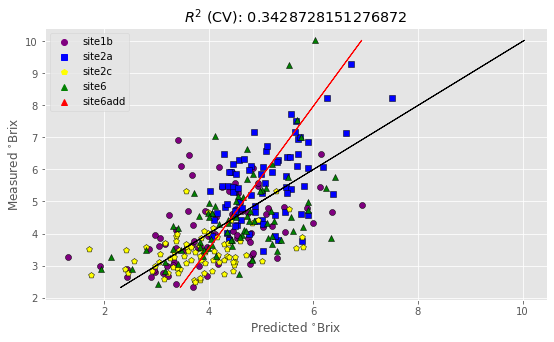

In [37]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

x1_d15n_std = opt_Xc_d15n_std[0:80,:]
x2_d15n_std = opt_Xc_d15n_std[80:160,:]
x3_d15n_std = opt_Xc_d15n_std[160:240,:]
x4_d15n_std = opt_Xc_d15n_std[240:550,:]

y1_d15n_std = y_d15n_std[0:80,:]
y2_d15n_std = y_d15n_std[80:160,:]
y3_d15n_std = y_d15n_std[160:240,:]
y4_d15n_std = y_d15n_std[240:550,:]


file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

In [92]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_d15n_std, y_d15n_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_std][wav_d15n_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(44,) (44,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 2.64166764,  3.47195936, -3.35864883,  2.69272964, -1.03001495,
       -0.17768691,  6.87394149,  2.49169635, -2.3166837 ,  6.12602982,
        0.72474568,  2.27919056,  1.51268057, -1.91171191, -2.7000971 ,
        2.87388226, -4.68771545, -2.65225058, -2.91754304,  3.57470772,
        0.83592135,  2.91518599, -1.97814959, -0.10962213, -2.06087571,
        1.97756196,  2.23420429,  2.49626751, -4.50452757, -0.66638787,
       -1.67178427,  0.63533922,  2.04035407, -3.92134343,  3.02842985,
       -1.90012402, -0.76521128, -2.13736098, -2.07636353,  1.02798127,
       -3.75597072, -3.15337067,  2.59037669, -4.47149041])

In [93]:
optimal_pls_sla.intercept_

array([4.39593001])

In [94]:
bands_sla

array(['band_125', 'band_43', 'band_362', 'band_148', 'band_221',
       'band_284', 'band_254', 'band_53', 'band_154', 'band_226',
       'band_152', 'band_398', 'band_217', 'band_364', 'band_366',
       'band_56', 'band_176', 'band_47', 'band_178', 'band_277',
       'band_93', 'band_54', 'band_349', 'band_133', 'band_109',
       'band_132', 'band_142', 'band_389', 'band_356', 'band_384',
       'band_224', 'band_183', 'band_31', 'band_51', 'band_27',
       'band_363', 'band_220', 'band_360', 'band_23', 'band_394',
       'band_46', 'band_29', 'band_391', 'band_169'], dtype='<U8')

# LA

In [38]:
la_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_la.npy',  allow_pickle=True)

In [39]:
y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [40]:
y_la_max1.shape

(320, 2)

In [41]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:80, :]
site2a_y_la_max1 = y_la_max1[80:160, :]
site2c_y_la_max1 = y_la_max1[160:240,:]
site6_y_la_max1_1 = y_la_max1[240:550,:]
# site6_y_la_max1_2 = y_la_max1[3394:3574,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1))
# site2c_x = x[]
y_la_max.shape

(320, 2)

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:80, :]
site2a_y_la_std1 = y_la_std1[80:160, :]
site2c_y_la_std1 = y_la_std1[160:240,:]
site6_y_la_std1_1 = y_la_std1[240:550,:]

y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1))
# site2c_x = x[]
y_la_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  241
Optimised MSEP  1.2281987098242424



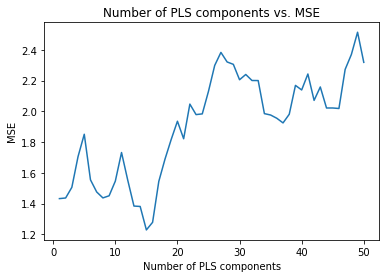

R2 calib: 0.614

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(



R2 CV: 0.315
MSE calib: 0.629
MSE CV: 1.118
[1.02993358] [0.48899851]
None
0 site1b [-0.6059061] [-1.340912170047499 'la_site1b_07_025.tif']
1 site1b [0.91593216] [0.046933293369786355 'la_site1b_09_028.tif']
2 site1b [1.80506862] [1.9559429922282279 'la_site1b_14_053.tif']
3 site1b [1.11096973] [2.6236476774520283 'la_site1b_17_025.tif']
4 site1b [4.87698888] [4.76561609600146 'la_site1b_18_046.tif']
5 site1b [3.5787655] [3.4996554315132693 'la_site1b_18_048.tif']
6 site1b [3.30062733] [3.7224931374501455 'la_site1b_18_051.tif']
7 site1b [1.29254126] [1.89262901586135 'la_site1b_19_063.tif']
8 site1b [0.5857537] [0.25080169126648855 'la_site1b_21_018.tif']
9 site1b [2.34153378] [-0.2812539364857729 'la_site1b_21_034.tif']
10 site1b [2.35208014] [3.872810623903833 'la_site1b_21_052.tif']
11 site1b [1.32045323] [2.1792209495447903 'la_site1b_22_035.tif']
12 site1b [2.71738685] [3.0745423515674606 'la_site1b_22_037.tif']
13 site1b [3.33914043] [0.9762607264373564 'la_site1b_22_038.tif']

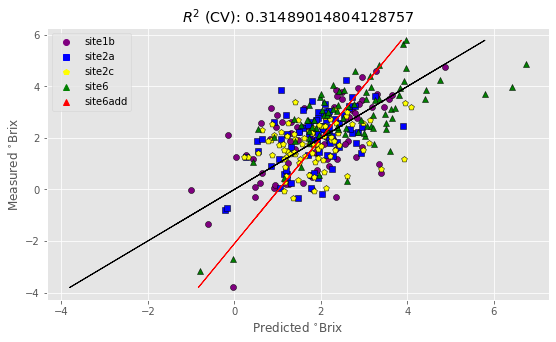

In [43]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:80,:]
x2_la_max = opt_Xc_la_max[80:160,:]
x3_la_max = opt_Xc_la_max[160:240,:]
x4_la_max = opt_Xc_la_max[240:550,:]

y1_la_max = y_la_max[0:80,:]
y2_la_max = y_la_max[80:160,:]
y3_la_max = y_la_max[160:240,:]
y4_la_max = y_la_max[240:550,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

In [95]:
optimal_pls_sla  = PLSRegression(n_components=15)
optimal_pls_sla.fit(opt_Xc_la_max, y_la_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_max][wav_la_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(78,) (78,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-1.33035718,  5.49694752,  1.48590381,  4.80790879, -2.70461886,
        1.75424851,  2.69517504,  1.71334304,  1.25110094,  2.09445103,
        1.33173845, -0.54496218,  3.99539269,  1.21420382, -1.68816703,
       -2.16448777, -0.69801909,  0.66747125,  3.3594591 ,  1.57225752,
       -2.0715836 , -1.00133656, -0.88122997, -2.53675243, -5.13859645,
        3.72758988,  4.24072903, -3.08351248, -2.76475896, -2.545268  ,
       -0.83846468, -0.85238186, -3.57227696, -0.72158011, -1.41780339,
       -1.56369948,  7.9138966 , -2.39321042,  0.78210183, -0.99643743,
       -5.26766665,  1.68590001, -1.13873255, -1.11254713,  2.42452629,
       -2.69868122,  1.29877617, -2.53001499,  0.16972179, -0.76686962,
       -2.36878053, -2.76478391,  4.21391146,  3.05309917, -4.24836724,
        3.72430106, -2.59446641, -3.15204747, -4.17019407,  3.31468767,
        1.83995854, -1.80692234,  1.25464541,  1.03674905,  2.51021008,
       -4.20155034, -1.94017165, -4.03922943,  3.16762536, -2.46

In [96]:
bands_sla

array(['band_243', 'band_103', 'band_182', 'band_109', 'band_276',
       'band_403', 'band_178', 'band_184', 'band_394', 'band_377',
       'band_401', 'band_385', 'band_334', 'band_106', 'band_28',
       'band_47', 'band_54', 'band_62', 'band_104', 'band_382', 'band_59',
       'band_368', 'band_379', 'band_144', 'band_170', 'band_374',
       'band_85', 'band_21', 'band_376', 'band_378', 'band_327',
       'band_115', 'band_113', 'band_247', 'band_346', 'band_89',
       'band_266', 'band_388', 'band_390', 'band_220', 'band_373',
       'band_83', 'band_337', 'band_32', 'band_340', 'band_74',
       'band_116', 'band_95', 'band_351', 'band_344', 'band_278',
       'band_160', 'band_98', 'band_395', 'band_84', 'band_66',
       'band_361', 'band_119', 'band_108', 'band_42', 'band_389',
       'band_31', 'band_142', 'band_114', 'band_18', 'band_249',
       'band_105', 'band_65', 'band_271', 'band_34', 'band_338',
       'band_161', 'band_372', 'band_223', 'band_37', 'band_27',
     

In [97]:
optimal_pls_sla.intercept_

array([2.09909708])

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  273
Optimised MSEP  0.334093435673491



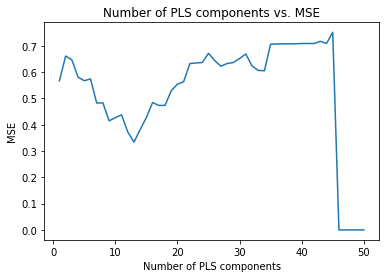

R2 calib: 0.610
R2 CV: 0.430
MSE calib: 0.225
MSE CV: 0.330
[1.24166745] [0.53349341]
None
0 site1b [2.74211364] [2.2353469711481795 'la_site1b_07_025.tif']
1 site1b [1.73560228] [1.54809444166105 'la_site1b_09_028.tif']
2 site1b [2.67242028] [2.7786935232298258 'la_site1b_14_053.tif']
3 site1b [2.30158279] [1.6588151056093932 'la_site1b_17_025.tif']
4 site1b [2.93657323] [2.335854664081248 'la_site1b_18_046.tif']
5 site1b [2.7664292] [1.6643930033991525 'la_site1b_18_048.tif']
6 site1b [2.39066477] [1.9476074892149586 'la_site1b_18_051.tif']
7 site1b [2.53746936] [2.3135575437466738 'la_site1b_19_063.tif']
8 site1b [1.80671197] [2.0574493472246016 'la_site1b_21_018.tif']
9 site1b [3.12488048] [3.0396963353327315 'la_site1b_21_034.tif']
10 site1b [2.43518317] [2.6013374776103255 'la_site1b_21_052.tif']
11 site1b [2.33449902] [1.9690956131164257 'la_site1b_22_035.tif']
12 site1b [2.91125929] [2.9295801131131083 'la_site1b_22_037.tif']
13 site1b [3.15363095] [2.7069467332978774 'la_site1

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site1b [1.82525574] [1.5599217307197712 'la_site1b_57_070.tif']
79 site1b [1.93990422] [2.2567692130206134 'la_site1b_57_083.tif']
80 site2a [3.08655711] [2.757897689171257 'la_site2a_10_015.tif']
81 site2a [2.94576045] [2.5130118516259503 'la_site2a_10_018.tif']
82 site2a [2.8684736] [1.9637854986985968 'la_site2a_10_021.tif']
83 site2a [3.36757625] [2.5861197239118865 'la_site2a_10_022.tif']
84 site2a [2.84088368] [2.956656060911852 'la_site2a_10_027.tif']
85 site2a [1.48635595] [2.6085368481170104 'la_site2a_12_012.tif']
86 site2a [2.05776471] [2.355536565322003 'la_site2a_12_013.tif']
87 site2a [2.44367662] [3.076339273948935 'la_site2a_12_018.tif']
88 site2a [2.20058729] [1.9277067449457244 'la_site2a_12_020.tif']
89 site2a [2.50960995] [2.052132556917282 'la_site2a_12_023.tif']
90 site2a [2.82249706] [3.152209139020694 'la_site2a_14_025.tif']
91 site2a [2.72266612] [2.284860700872276 'la_site2a_14_027.tif']
92 site2a [2.67968203] [2.464692520878645 'la_site2a_14_029.tif']
93 sit

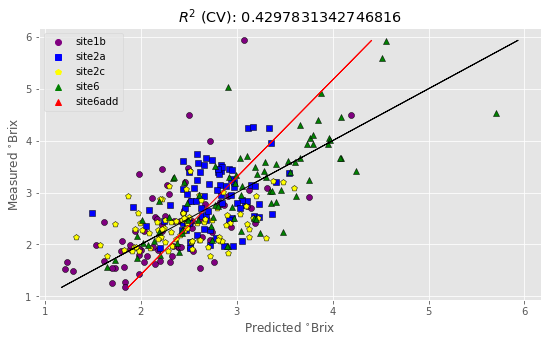

In [44]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:80,:]
x2_la_std = opt_Xc_la_std[80:160,:]
x3_la_std = opt_Xc_la_std[160:240,:]
x4_la_std = opt_Xc_la_std[240:550,:]

y1_la_std = y_la_std[0:80,:]
y2_la_std = y_la_std[80:160,:]
y3_la_std = y_la_std[160:240,:]
y4_la_std = y_la_std[240:550,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

In [98]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_la_std, y_la_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_std][wav_la_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(46,) (46,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.60158033, -2.15246142,  1.00844078,  1.00942321,  1.37022065,
        3.22584088, -1.32502817, -0.10539241, -2.47040607, -0.03368247,
       -1.2849817 , -0.1767952 ,  1.57569945, -0.83843314,  1.34527864,
       -1.87716436,  3.21546267,  3.14547315, -2.15514986, -3.22340518,
       -0.89040243,  0.58087847,  1.51103221,  2.44785099, -1.118511  ,
        1.84995391,  1.08591687, -0.44591018,  3.40406037,  1.4505113 ,
       -2.50885038, -0.88298952, -0.02697707, -0.35271664, -2.74799249,
       -0.91788266, -1.3271321 ,  1.25691801, -3.09941904,  1.96301311,
        2.63375804,  1.09951707, -1.02435324,  1.2119529 , -2.73898409,
       -3.24675885])

In [99]:
bands_sla

array(['band_111', 'band_363', 'band_380', 'band_281', 'band_225',
       'band_43', 'band_221', 'band_131', 'band_274', 'band_34',
       'band_157', 'band_31', 'band_137', 'band_67', 'band_140',
       'band_360', 'band_244', 'band_331', 'band_121', 'band_51',
       'band_65', 'band_219', 'band_389', 'band_256', 'band_169',
       'band_50', 'band_216', 'band_23', 'band_52', 'band_277',
       'band_384', 'band_29', 'band_26', 'band_183', 'band_176',
       'band_93', 'band_47', 'band_116', 'band_356', 'band_165',
       'band_381', 'band_391', 'band_178', 'band_133', 'band_349',
       'band_224'], dtype='<U8')

In [100]:
optimal_pls_sla.intercept_

array([2.6819999])

# SLA

In [45]:
sla_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_sla.npy',  allow_pickle=True)

In [46]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [47]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:80, :]
site2a_y_sla_max1 = y_sla_max1[80:160, :]
site2c_y_sla_max1 = y_sla_max1[160:240,:]
site6_y_sla_max1_1 = y_sla_max1[240:550,:]
# site6_y_sla_max1_2 = y_sla_max1[3394:3574,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1))
# site2c_x = x[]
y_sla_max.shape

(320, 2)

In [48]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:80, :]
site2a_y_sla_std1 = y_sla_std1[80:160, :]
site2c_y_sla_std1 = y_sla_std1[160:240,:]
site6_y_sla_std1_1 = y_sla_std1[240:550,:]
# site6_y_sla_std1_2 = y_sla_std1[3394:3574,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1))
# site2c_x = x[]
y_sla_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  253
Optimised MSEP  0.019716090161444925



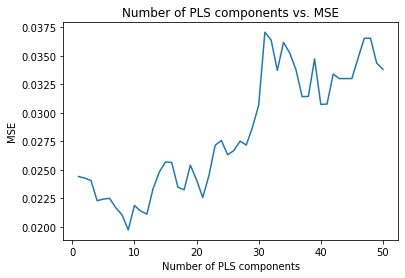

R2 calib: 0.598
R2 CV: 0.474
MSE calib: 0.015
MSE CV: 0.019
[2.24615676] [0.51223367]
None
0 site1b [4.53755873] [4.340138456464482 'sla_site1b_07_025.tif']
1 site1b [4.24603533] [4.258114566895749 'sla_site1b_09_028.tif']
2 site1b [4.64255462] [4.9133540736582715 'sla_site1b_14_053.tif']
3 site1b [4.41186262] [4.35779710146075 'sla_site1b_17_025.tif']
4 site1b [4.84607121] [4.812944881672285 'sla_site1b_18_046.tif']
5 site1b [4.91814184] [4.834504490353423 'sla_site1b_18_048.tif']
6 site1b [4.81010475] [4.849321305055326 'sla_site1b_18_051.tif']
7 site1b [4.59842445] [4.758180755175872 'sla_site1b_19_063.tif']
8 site1b [4.29556704] [4.245994973282715 'sla_site1b_21_018.tif']
9 site1b [4.28331854] [4.3701187166888165 'sla_site1b_21_034.tif']
10 site1b [4.77797517] [4.796567427059205 'sla_site1b_21_052.tif']
11 site1b [4.51019055] [4.720023488562766 'sla_site1b_22_035.tif']
12 site1b [4.66894617] [4.842023934234157 'sla_site1b_22_037.tif']
13 site1b [4.56598784] [4.629792070296109 'sla_

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site1b [4.62484274] [4.448150444740754 'sla_site1b_46_092.tif']
56 site1b [4.55754439] [4.644790005305007 'sla_site1b_47_036.tif']
57 site1b [4.77016799] [4.815607027875542 'sla_site1b_47_053.tif']
58 site1b [4.72706503] [4.69203152813955 'sla_site1b_47_069.tif']
59 site1b [4.56107621] [4.755328895531232 'sla_site1b_47_091.tif']
60 site1b [4.58534219] [4.428994153252463 'sla_site1b_48_095.tif']
61 site1b [4.35771258] [4.447065002953677 'sla_site1b_48_096.tif']
62 site1b [4.57442425] [4.85504663262706 'sla_site1b_49_039.tif']
63 site1b [4.72645578] [4.678944943121483 'sla_site1b_49_040.tif']
64 site1b [4.70257781] [4.5905775007998235 'sla_site1b_49_084.tif']
65 site1b [4.59966588] [4.675605532413849 'sla_site1b_49_094.tif']
66 site1b [4.71248765] [4.871659286133889 'sla_site1b_51_061.tif']
67 site1b [4.75193195] [4.6183326854367905 'sla_site1b_51_075.tif']
68 site1b [4.48150547] [4.414400229193328 'sla_site1b_52_044.tif']
69 site1b [4.82099766] [4.7575951294463605 'sla_site1b_53_065.ti

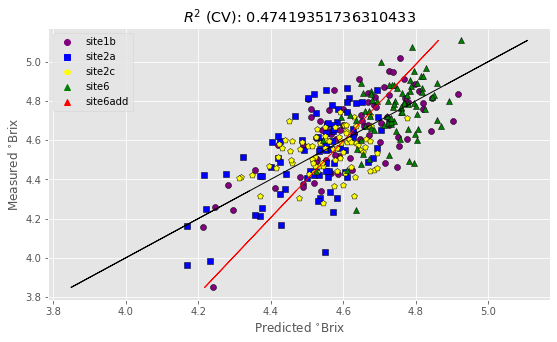

In [49]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:80,:]
x2_sla_max = opt_Xc_sla_max[80:160,:]
x3_sla_max = opt_Xc_sla_max[160:240,:]
x4_sla_max = opt_Xc_sla_max[240:550,:]

y1_sla_max = y_sla_max[0:80,:]
y2_sla_max = y_sla_max[80:160,:]
y3_sla_max = y_sla_max[160:240,:]
y4_sla_max = y_sla_max[240:550,:]
file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [67]:
band_name = np.array(band_name)

In [79]:
optimal_pls_sla  = PLSRegression(n_components=9)
optimal_pls_sla.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(66,) (66,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.11687795,  0.18482124, -0.12778622, -0.06650624, -0.15981467,
        0.13825327, -0.11169829, -0.10050395, -0.11216979, -0.08285548,
        0.12537826, -0.05185123,  0.08273696,  0.04992007, -0.10161266,
        0.13833658,  0.08469282, -0.08920473,  0.11701786, -0.09493213,
        0.18907495, -0.11198962,  0.18211228, -0.14344888,  0.09668979,
       -0.11316053, -0.0976681 , -0.09537324,  0.17915589, -0.11805132,
        0.13633297,  0.13686847,  0.15904991,  0.13253456, -0.07879894,
       -0.15427929,  0.10821625,  0.18576715, -0.10642869, -0.07068917,
       -0.16183501, -0.2021803 ,  0.1498921 , -0.03691578,  0.1795907 ,
       -0.15241063,  0.14484845,  0.15453694, -0.17184056, -0.14440565,
        0.23227947,  0.19219192, -0.20743108,  0.21385773,  0.21634277,
       -0.15734996, -0.16218677,  0.10517036, -0.28528131,  0.23540406,
       -0.20201049,  0.18872363,  0.19285181, -0.082422  , -0.21711175,
       -0.22218364])

In [80]:
optimal_pls_sla.intercept_

array([4.60843824])

In [85]:
bands_sla

array(['band_126', 'band_183', 'band_256', 'band_381', 'band_52',
       'band_274', 'band_173', 'band_66', 'band_233', 'band_269',
       'band_391', 'band_389', 'band_60', 'band_36', 'band_368',
       'band_26', 'band_153', 'band_362', 'band_225', 'band_16',
       'band_356', 'band_235', 'band_180', 'band_382', 'band_224',
       'band_43', 'band_31', 'band_390', 'band_260', 'band_185',
       'band_178', 'band_128', 'band_131', 'band_125', 'band_151',
       'band_111', 'band_360', 'band_176', 'band_33', 'band_384',
       'band_220', 'band_400', 'band_363', 'band_53', 'band_51',
       'band_23', 'band_229', 'band_116', 'band_29', 'band_38', 'band_56',
       'band_138', 'band_152', 'band_398', 'band_120', 'band_169'],
      dtype='<U8')

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  263
Optimised MSEP  0.006825207513975348



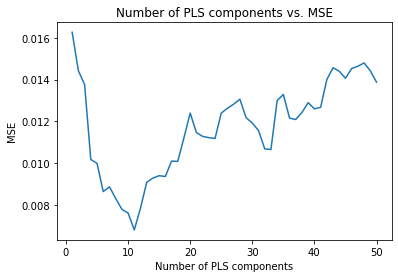

R2 calib: 0.760
R2 CV: 0.630
MSE calib: 0.004
MSE CV: 0.007
[0.13741919] [0.69495563]
None
0 site1b [0.48897824] [0.40997178508406024 'sla_site1b_07_025.tif']
1 site1b [0.33877482] [0.2547350189374822 'sla_site1b_09_028.tif']
2 site1b [0.3698974] [0.4283325154450881 'sla_site1b_14_053.tif']
3 site1b [0.36370945] [0.25772634063324346 'sla_site1b_17_025.tif']
4 site1b [0.34160126] [0.3100905105609133 'sla_site1b_18_046.tif']
5 site1b [0.35995019] [0.24029582577507913 'sla_site1b_18_048.tif']
6 site1b [0.24160374] [0.2619669517488958 'sla_site1b_18_051.tif']
7 site1b [0.32563462] [0.34041744503459653 'sla_site1b_19_063.tif']
8 site1b [0.36696395] [0.27105415739555005 'sla_site1b_21_018.tif']
9 site1b [0.37567003] [0.41726448678916955 'sla_site1b_21_034.tif']
10 site1b [0.35361078] [0.31327176132431883 'sla_site1b_21_052.tif']
11 site1b [0.35920762] [0.3242465869602107 'sla_site1b_22_035.tif']
12 site1b [0.38159903] [0.46213457041809125 'sla_site1b_22_037.tif']
13 site1b [0.3271288] [0.462

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site2a [0.64576363] [0.7145110476952788 'sla_site2a_24_032.tif']
130 site2a [0.51018897] [0.5741955660695341 'sla_site2a_26_014.tif']
131 site2a [0.47875573] [0.47746630261122586 'sla_site2a_26_015.tif']
132 site2a [0.49110189] [0.5014235361950794 'sla_site2a_26_017.tif']
133 site2a [0.50926392] [0.6710515112084922 'sla_site2a_26_024.tif']
134 site2a [0.51050529] [0.4254200348331339 'sla_site2a_27_012.tif']
135 site2a [0.56047393] [0.553788514437159 'sla_site2a_27_019.tif']
136 site2a [0.53151511] [0.6128509754378906 'sla_site2a_27_020.tif']
137 site2a [0.62628857] [0.7705805331576688 'sla_site2a_27_022.tif']
138 site2a [0.56783124] [0.6458375424863728 'sla_site2a_28_030.tif']
139 site2a [0.44176311] [0.43867883412378517 'sla_site2a_29_015.tif']
140 site2a [0.51876373] [0.3882979668205155 'sla_site2a_29_021.tif']
141 site2a [0.48930183] [0.5456566849130897 'sla_site2a_29_022.tif']
142 site2a [0.5157677] [0.4991442600318584 'sla_site2a_29_024.tif']
143 site2a [0.47980814] [0.6162170252

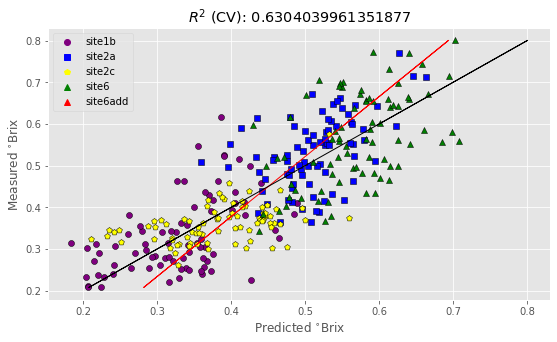

In [50]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:80,:]
x2_sla_std = opt_Xc_sla_std[80:160,:]
x3_sla_std = opt_Xc_sla_std[160:240,:]
x4_sla_std = opt_Xc_sla_std[240:550,:]

y1_sla_std = y_sla_std[0:80,:]
y2_sla_std = y_sla_std[80:160,:]
y3_sla_std = y_sla_std[160:240,:]
y4_sla_std = y_sla_std[240:550,:]
file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

In [86]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_sla_std, y_sla_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_std][wav_sla_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(56,) (56,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.36488017, -0.1805377 ,  0.26787358,  0.19632002,  0.00137744,
       -0.19848644, -0.16509055, -0.25786154,  0.13694351,  0.07004145,
        0.11366584,  0.22643916,  0.11678778, -0.18352684, -0.17868093,
       -0.1568651 ,  0.01676428, -0.14548016,  0.26406663,  0.14558713,
       -0.26336187,  0.234689  ,  0.15262039, -0.04229168, -0.24392878,
        0.15883352,  0.21819033,  0.08532824,  0.19934606, -0.05472118,
       -0.10341438, -0.01451314, -0.07932898,  0.18191509, -0.10713418,
        0.11221303, -0.22518191, -0.04499517, -0.15071727, -0.17221791,
       -0.0671615 ,  0.1334735 , -0.41769708,  0.36559032, -0.22497026,
       -0.19305644,  0.12813785,  0.25040325, -0.13687904,  0.17547804,
        0.19377186,  0.1834642 ,  0.10311426,  0.10290244,  0.13147294,
       -0.24205832])

In [87]:
optimal_pls_sla.intercept_

array([0.44781092])

In [88]:
bands_sla

array(['band_126', 'band_183', 'band_256', 'band_381', 'band_52',
       'band_274', 'band_173', 'band_66', 'band_233', 'band_269',
       'band_391', 'band_389', 'band_60', 'band_36', 'band_368',
       'band_26', 'band_153', 'band_362', 'band_225', 'band_16',
       'band_356', 'band_235', 'band_180', 'band_382', 'band_224',
       'band_43', 'band_31', 'band_390', 'band_260', 'band_185',
       'band_178', 'band_128', 'band_131', 'band_125', 'band_151',
       'band_111', 'band_360', 'band_176', 'band_33', 'band_384',
       'band_220', 'band_400', 'band_363', 'band_53', 'band_51',
       'band_23', 'band_229', 'band_116', 'band_29', 'band_38', 'band_56',
       'band_138', 'band_152', 'band_398', 'band_120', 'band_169'],
      dtype='<U8')

# LDMC

In [51]:
ldmc_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_ldmc.npy',  allow_pickle=True)

In [52]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [53]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:80, :]
site2a_y_ldmc_max1 = y_ldmc_max1[80:160, :]
site2c_y_ldmc_max1 = y_ldmc_max1[160:240,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[240:550,:]
# site6_y_ldmc_max1_2 = y_ldmc_max1[3394:3574,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1))
# site2c_x = x[]
y_ldmc_max.shape

(320, 2)

In [54]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:80, :]
site2a_y_ldmc_std1 = y_ldmc_std1[80:160, :]
site2c_y_ldmc_std1 = y_ldmc_std1[160:240,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[240:550,:]
# site6_y_ldmc_std1_2 = y_ldmc_std1[3394:3574,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1))
# site2c_x = x[]
y_ldmc_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  190
Optimised MSEP  0.1623712647764795



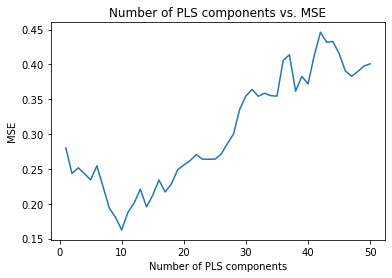

R2 calib: 0.677
R2 CV: 0.464
MSE calib: 0.091
MSE CV: 0.151
[-0.21236059] [0.57827583]
None
0 site1b [-0.66825632] [-1.7461826254792019 'ldmc_site1b_07_025.tif']
1 site1b [-0.72985498] [-1.074536595408957 'ldmc_site1b_09_028.tif']
2 site1b [-0.01277608] [0.9337864925634745 'ldmc_site1b_14_053.tif']
3 site1b [-0.42702116] [-0.05114162293079283 'ldmc_site1b_17_025.tif']
4 site1b [0.18292031] [0.3324332399170351 'ldmc_site1b_18_046.tif']
5 site1b [0.19304606] [-0.14104293155712444 'ldmc_site1b_18_048.tif']
6 site1b [0.12654463] [0.4031746135589154 'ldmc_site1b_18_051.tif']
7 site1b [-0.30254728] [-0.008496474430611745 'ldmc_site1b_19_063.tif']
8 site1b [-0.69454262] [-1.001230949165934 'ldmc_site1b_21_018.tif']
9 site1b [-0.69355334] [-0.27348907121794763 'ldmc_site1b_21_034.tif']
10 site1b [-0.13095093] [0.19808243028857886 'ldmc_site1b_21_052.tif']
11 site1b [-0.584351] [-0.4453230276246227 'ldmc_site1b_22_035.tif']
12 site1b [-0.17166137] [-0.1008998279008737 'ldmc_site1b_22_037.tif']


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[0.05873392] [-0.04414410993182116 'ldmc_site2a_10_027.tif']
85 site2a [-0.09613342] [-0.2917765654186968 'ldmc_site2a_12_012.tif']
86 site2a [-0.41884546] [-0.08997181972417989 'ldmc_site2a_12_013.tif']
87 site2a [-0.05082765] [-0.087807451326821 'ldmc_site2a_12_018.tif']
88 site2a [-0.40103782] [-0.19835159803584768 'ldmc_site2a_12_020.tif']
89 site2a [-0.3086245] [-0.11431703178871766 'ldmc_site2a_12_023.tif']
90 site2a [0.02122991] [0.21291216833262983 'ldmc_site2a_14_025.tif']
91 site2a [-0.36833689] [-0.5760947748154441 'ldmc_site2a_14_027.tif']
92 site2a [-0.15826054] [-0.5778119786025764 'ldmc_site2a_14_029.tif']
93 site2a [-0.47982462] [-0.5612218897267871 'ldmc_site2a_14_031.tif']
94 site2a [-0.34928] [-0.7665628371324527 'ldmc_site2a_14_032.tif']
95 site2a [-0.54356289] [-0.5386584249613318 'ldmc_site2a_16_029.tif']
96 site2a [-0.93489493] [-0.8092647160446802 'ldmc_site2a_16_030.tif']
97 site2a [-0.08224931] [-0.27716714534151965 'ldmc_site2a_17_014.tif']
98 site2a [-0.1758

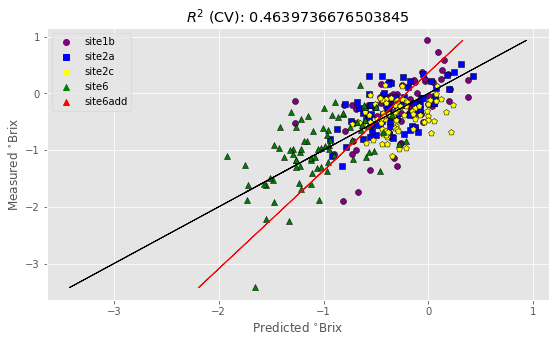

In [55]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:80,:]
x2_ldmc_max = opt_Xc_ldmc_max[80:160,:]
x3_ldmc_max = opt_Xc_ldmc_max[160:240,:]
x4_ldmc_max = opt_Xc_ldmc_max[240:550,:]

y1_ldmc_max = y_ldmc_max[0:80,:]
y2_ldmc_max = y_ldmc_max[80:160,:]
y3_ldmc_max = y_ldmc_max[160:240,:]
y4_ldmc_max = y_ldmc_max[240:550,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [101]:
optimal_pls_sla  = PLSRegression(n_components=10)
optimal_pls_sla.fit(opt_Xc_ldmc_max, y_ldmc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_max][wav_ldmc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(129,) (129,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.20485221,  0.23879167, -0.21482372,  0.18952545, -0.36584918,
        0.26297186, -0.28572318, -0.17805443, -0.2298254 , -0.36019277,
       -0.40903909, -0.33312712, -0.18890073,  0.33882287,  0.30036411,
       -0.32689109, -0.39067532,  0.25673445,  0.17043383, -0.36467478,
        0.27199854, -0.25688093,  0.2630175 ,  0.29988406,  0.14590577,
       -0.31413297, -0.36137305, -0.11411245,  0.31219608, -0.25516891,
        0.35197317,  0.32148549,  0.28376599,  0.35512436, -0.38538899,
       -0.28632409,  0.21093216, -0.32328377, -0.22436474,  0.25540019,
        0.41704878,  0.27724419, -0.35007518,  0.25750346,  0.33437943,
        0.33057576, -0.38858082,  0.24041934, -0.25839331, -0.09273234,
        0.29794888,  0.24805676, -0.38793363, -0.35988809,  0.3200857 ,
        0.2119333 , -0.40738386,  0.36434012,  0.31837973,  0.21263896,
       -0.16817466, -0.41534207, -0.34723552, -0.39544819, -0.40154219,
        0.30965729, -0.3971615 , -0.29780793,  0.31826745,  0.33

In [102]:
optimal_pls_sla.intercept_

array([-0.48384781])

In [103]:
bands_sla

array(['band_342', 'band_228', 'band_171', 'band_371', 'band_361',
       'band_328', 'band_35', 'band_16', 'band_91', 'band_373',
       'band_381', 'band_237', 'band_158', 'band_131', 'band_335',
       'band_260', 'band_49', 'band_266', 'band_144', 'band_242',
       'band_53', 'band_58', 'band_169', 'band_330', 'band_400',
       'band_182', 'band_77', 'band_153', 'band_114', 'band_244',
       'band_283', 'band_137', 'band_23', 'band_78', 'band_337',
       'band_132', 'band_139', 'band_24', 'band_165', 'band_17',
       'band_128', 'band_18', 'band_218', 'band_356', 'band_355',
       'band_227', 'band_146', 'band_176', 'band_166', 'band_118',
       'band_277', 'band_393', 'band_59', 'band_348', 'band_274',
       'band_281', 'band_377', 'band_155', 'band_107', 'band_326',
       'band_402', 'band_251', 'band_340', 'band_181', 'band_389',
       'band_177', 'band_336', 'band_119', 'band_270', 'band_142',
       'band_57', 'band_268', 'band_247', 'band_60', 'band_111',
       'ba

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  247
Optimised MSEP  0.025822219345942903



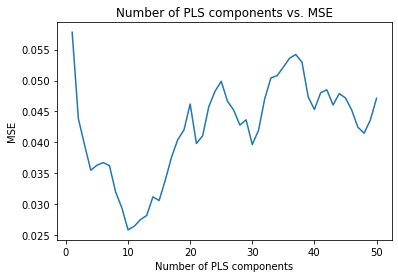

R2 calib: 0.789
R2 CV: 0.583
MSE calib: 0.014
MSE CV: 0.028
[0.32072272] [0.63511513]
None
0 site1b [0.93513824] [0.7565050961303746 'ldmc_site1b_07_025.tif']
1 site1b [0.6727038] [0.6381512645296985 'ldmc_site1b_09_028.tif']
2 site1b [1.41402276] [1.0830882399376398 'ldmc_site1b_14_053.tif']
3 site1b [0.77615655] [0.5276469676518156 'ldmc_site1b_17_025.tif']
4 site1b [0.73742137] [0.5752477544305051 'ldmc_site1b_18_046.tif']
5 site1b [0.75382683] [0.6183072039174886 'ldmc_site1b_18_048.tif']
6 site1b [0.59843288] [0.4874794129487925 'ldmc_site1b_18_051.tif']
7 site1b [0.76274925] [0.761589200600101 'ldmc_site1b_19_063.tif']
8 site1b [0.98311412] [1.0979243184508611 'ldmc_site1b_21_018.tif']
9 site1b [0.85598614] [1.0677705915849725 'ldmc_site1b_21_034.tif']
10 site1b [0.67339139] [0.7518861047137793 'ldmc_site1b_21_052.tif']
11 site1b [0.93659604] [0.8257930430124154 'ldmc_site1b_22_035.tif']
12 site1b [0.95578218] [0.9017027255960933 'ldmc_site1b_22_037.tif']
13 site1b [0.5072307] [0

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[0.87734495] [0.796687332180523 'ldmc_site2a_14_029.tif']
93 site2a [0.98486778] [0.9103870075913872 'ldmc_site2a_14_031.tif']
94 site2a [0.90261507] [0.828745758370187 'ldmc_site2a_14_032.tif']
95 site2a [0.87232185] [0.9344295522836081 'ldmc_site2a_16_029.tif']
96 site2a [0.99820379] [0.9014168634161696 'ldmc_site2a_16_030.tif']
97 site2a [0.8733032] [0.8925848306055262 'ldmc_site2a_17_014.tif']
98 site2a [0.86146803] [0.8393697245937879 'ldmc_site2a_17_016.tif']
99 site2a [0.96379403] [0.8143023341699184 'ldmc_site2a_17_017.tif']
100 site2a [0.96713556] [0.8875330502417415 'ldmc_site2a_17_018.tif']
101 site2a [0.81798099] [0.8770134934958828 'ldmc_site2a_17_022.tif']
102 site2a [0.81486274] [0.7506379924492649 'ldmc_site2a_18_030.tif']
103 site2a [0.86004886] [1.0743296369180015 'ldmc_site2a_18_031.tif']
104 site2a [0.79096592] [0.8452669156667558 'ldmc_site2a_19_014.tif']
105 site2a [0.85493301] [0.9823644510231455 'ldmc_site2a_19_016.tif']
106 site2a [0.89220581] [0.94204559917442

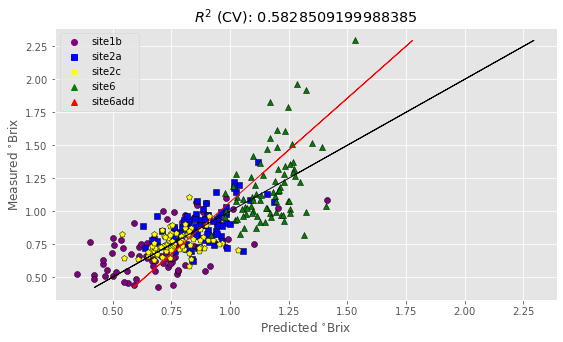

In [56]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:80,:]
x2_ldmc_std = opt_Xc_ldmc_std[80:160,:]
x3_ldmc_std = opt_Xc_ldmc_std[160:240,:]
x4_ldmc_std = opt_Xc_ldmc_std[240:550,:]

y1_ldmc_std = y_ldmc_std[0:80,:]
y2_ldmc_std = y_ldmc_std[80:160,:]
y3_ldmc_std = y_ldmc_std[160:240,:]
y4_ldmc_std = y_ldmc_std[240:550,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

In [104]:
optimal_pls_sla  = PLSRegression(n_components=10)
optimal_pls_sla.fit(opt_Xc_ldmc_std, y_ldmc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_std][wav_ldmc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(72,) (72,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.22296509,  0.30208125,  0.39407749, -0.23511537, -0.02046703,
        0.27869539, -0.30279039,  0.34071902, -0.32032874,  0.32816321,
       -0.26913802, -0.2038255 , -0.29230472, -0.35113631, -0.10742521,
        0.16486598,  0.33300297,  0.32920374, -0.198745  ,  0.25429239,
        0.27574039,  0.30731821,  0.30260928, -0.21972125, -0.26408654,
        0.3257665 ,  0.31296435, -0.41680388, -0.34002142, -0.44846746,
       -0.37594302,  0.15445935, -0.20670729,  0.36359753, -0.34852981,
       -0.2105136 ,  0.27693781, -0.31924522, -0.18874828,  0.02191015,
       -0.1445354 ,  0.49214037, -0.03259771,  0.17242178, -0.44419244,
        0.23170777, -0.31112906,  0.24676104,  0.36196428, -0.12725744,
        0.30536607,  0.31275152, -0.19144613, -0.21074679,  0.1743063 ,
        0.09719107, -0.43211987,  0.3981291 , -0.32385862,  0.30551267,
        0.52678432,  0.42561349,  0.29675698, -0.39443189, -0.38102313,
        0.2560498 , -0.28010743, -0.30359544, -0.22147795, -0.24

In [105]:
optimal_pls_sla.intercept_

array([0.8884584])

In [106]:
bands_sla

array(['band_341', 'band_260', 'band_370', 'band_62', 'band_175',
       'band_100', 'band_356', 'band_54', 'band_281', 'band_245',
       'band_160', 'band_99', 'band_63', 'band_338', 'band_169',
       'band_133', 'band_234', 'band_115', 'band_178', 'band_259',
       'band_233', 'band_55', 'band_120', 'band_240', 'band_344',
       'band_53', 'band_139', 'band_78', 'band_101', 'band_278',
       'band_40', 'band_119', 'band_66', 'band_353', 'band_154',
       'band_28', 'band_31', 'band_364', 'band_126', 'band_152',
       'band_65', 'band_225', 'band_136', 'band_18', 'band_224',
       'band_110', 'band_350', 'band_104', 'band_359', 'band_155',
       'band_71', 'band_138', 'band_70', 'band_220', 'band_79',
       'band_113', 'band_349', 'band_223', 'band_93', 'band_108',
       'band_390', 'band_56', 'band_381', 'band_355', 'band_51',
       'band_60', 'band_29', 'band_173', 'band_117', 'band_176',
       'band_327', 'band_399'], dtype='<U8')

# PN

In [ ]:
# pn_trait_pdf_ymax = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_ymax_pn.npy',  allow_pickle=True)
# pn_trait_pdf_std = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_std_pn.npy',  allow_pickle=True)

In [ ]:
# y_pn_max1 = np.array(pn_trait_pdf_ymax)

# y_pn_std1 = np.array(pn_trait_pdf_std)

In [ ]:
# site1b_y_pn_max1 = y_pn_max1[0:300, :]
# site2a_y_pn_max1 = y_pn_max1[300:600, :]
# site2c_y_pn_max1 = y_pn_max1[600:900,:]
# site6_y_pn_max1_1 = y_pn_max1[900:1193,:]
# # site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
# y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1))
# # site2c_x = x[]
# y_pn_max.shape

In [ ]:
# site1b_y_pn_std1 = y_pn_std1[0:300, :]
# site2a_y_pn_std1 = y_pn_std1[300:600, :]
# site2c_y_pn_std1 = y_pn_std1[600:900,:]
# site6_y_pn_std1_1 = y_pn_std1[900:1193,:]
# # site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
# y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1))
# # site2c_x = x[]
# y_pn_std.shape

In [ ]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
# x1_pn_max = opt_Xc_pn_max[0:300,:]
# x2_pn_max = opt_Xc_pn_max[300:600,:]
# x3_pn_max = opt_Xc_pn_max[600:900,:]
# x4_pn_max = opt_Xc_pn_max[900:1193,:]

# y1_pn_max = y_pn_max[0:300,:]
# y2_pn_max = y_pn_max[300:600,:]
# y3_pn_max = y_pn_max[600:900,:]
# y4_pn_max = y_pn_max[900:1193,:]
# file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
#                              y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
#                              ncomp_pn_max, labels, file_name_pn_max)

In [ ]:
# opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

# x1_pn_std = opt_Xc_pn_std[0:300,:]
# x2_pn_std = opt_Xc_pn_std[300:600,:]
# x3_pn_std = opt_Xc_pn_std[600:900,:]
# x4_pn_std = opt_Xc_pn_std[900:1193,:]

# y1_pn_std = y_pn_std[0:300,:]
# y2_pn_std = y_pn_std[300:600,:]
# y3_pn_std = y_pn_std[600:900,:]
# y4_pn_std = y_pn_std[900:1193,:]
# file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
#                              y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
#                              ncomp_pn_std, labels, file_name_pn_std)

# PC

In [57]:
pc_trait_pdf_ymax = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_pc.npy',  allow_pickle=True)

In [58]:
y_pc_max1 = np.array(pc_trait_pdf_ymax)

y_pc_std1 = np.array(pc_trait_pdf_std)

In [59]:
site1b_y_pc_max1 = y_pc_max1[0:80, :]
site2a_y_pc_max1 = y_pc_max1[80:160, :]
site2c_y_pc_max1 = y_pc_max1[160:240,:]
site6_y_pc_max1_1 = y_pc_max1[240:550,:]
# site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
y_pc_max = np.vstack((site1b_y_pc_max1, site2a_y_pc_max1,site2c_y_pc_max1,site6_y_pc_max1_1))
# site2c_x = x[]
y_pc_max.shape

(320, 2)

In [60]:
site1b_y_pc_std1 = y_pc_std1[0:80, :]
site2a_y_pc_std1 = y_pc_std1[80:160, :]
site2c_y_pc_std1 = y_pc_std1[160:240,:]
site6_y_pc_std1_1 = y_pc_std1[240:550,:]
# site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
y_pc_std = np.vstack((site1b_y_pc_std1, site2a_y_pc_std1,site2c_y_pc_std1,site6_y_pc_std1_1))
# site2c_x = x[]
y_pc_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  270
Optimised MSEP  0.003539019852925264



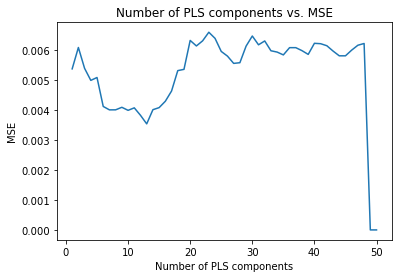

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [61]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:80,:]
x2_pc_max = opt_Xc_pc_max[80:160,:]
x3_pc_max = opt_Xc_pc_max[160:240,:]
x4_pc_max = opt_Xc_pc_max[240:550,:]

y1_pc_max = y_pc_max[0:80,:]
y2_pc_max = y_pc_max[80:160,:]
y3_pc_max = y_pc_max[160:240,:]
y4_pc_max = y_pc_max[240:550,:]


In [107]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_max, y_pc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_max][wav_pc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(49,) (49,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.10505286, -0.02017063, -0.06818693,  0.1950281 , -0.00310987,
        0.16140431, -0.05787285,  0.22454043, -0.09032591,  0.10411557,
       -0.25603923, -0.26975162, -0.13982779, -0.01530263,  0.17626623,
       -0.00344358, -0.16357411, -0.06425902, -0.08763429, -0.03365778,
       -0.08141339, -0.07396385,  0.08924456,  0.07940918,  0.2283007 ,
        0.11027172, -0.15595725,  0.11073977,  0.29475185,  0.11790372,
       -0.10987469, -0.10241028, -0.10450718,  0.17031232, -0.17392919,
       -0.13630364,  0.17080941,  0.06140991, -0.1551331 , -0.13055612,
        0.08703283,  0.26261089, -0.18008223, -0.06375585,  0.19982143,
        0.21241881, -0.32778655, -0.24379271,  0.15528376])

In [108]:
optimal_pls_sla.intercept_

array([3.82910439])

In [109]:
bands_sla

array(['band_39', 'band_18', 'band_20', 'band_244', 'band_335',
       'band_104', 'band_50', 'band_86', 'band_348', 'band_142',
       'band_84', 'band_167', 'band_65', 'band_106', 'band_404',
       'band_368', 'band_225', 'band_361', 'band_160', 'band_327',
       'band_396', 'band_34', 'band_393', 'band_29', 'band_82',
       'band_395', 'band_35', 'band_161', 'band_266', 'band_223',
       'band_284', 'band_108', 'band_30', 'band_37', 'band_88',
       'band_338', 'band_401', 'band_217', 'band_105', 'band_36',
       'band_116', 'band_45', 'band_32', 'band_62', 'band_271', 'band_42',
       'band_373', 'band_372', 'band_27'], dtype='<U8')

R2 calib: 0.594
R2 CV: 0.426
MSE calib: 0.002
MSE CV: 0.003
[1.91857665] [0.49902189]
None
0 site1b [3.69934429] [3.610214965691346 'pc_site1b_07_025.tif']
1 site1b [3.7145972] [3.6626225459510895 'pc_site1b_09_028.tif']
2 site1b [3.91975723] [3.841286831442227 'pc_site1b_14_053.tif']
3 site1b [3.73471116] [3.7884574142188194 'pc_site1b_17_025.tif']
4 site1b [3.90202631] [3.983499788544508 'pc_site1b_18_046.tif']
5 site1b [3.95081511] [3.925933860511611 'pc_site1b_18_048.tif']
6 site1b [3.89550253] [3.92043376955225 'pc_site1b_18_051.tif']
7 site1b [3.74470418] [3.82982352259038 'pc_site1b_19_063.tif']
8 site1b [3.70294974] [3.6307117440891066 'pc_site1b_21_018.tif']
9 site1b [3.71614241] [3.6501545940519557 'pc_site1b_21_034.tif']
10 site1b [3.8674967] [3.8975177212128402 'pc_site1b_21_052.tif']
11 site1b [3.77259454] [3.8077548055324746 'pc_site1b_22_035.tif']
12 site1b [3.8288757] [3.8644033126029402 'pc_site1b_22_037.tif']
13 site1b [3.774088] [3.767522471262238 'pc_site1b_22_038.t

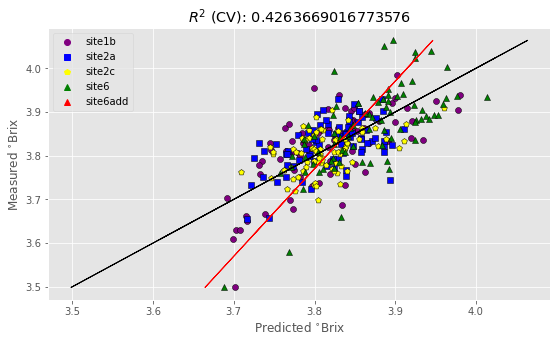

In [62]:
file_name_pc_max = 'E:/wenqu/model_csv_point/pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  262
Optimised MSEP  0.0009656933017233537



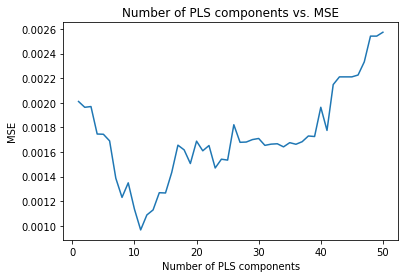

R2 calib: 0.682
R2 CV: 0.522
MSE calib: 0.001
MSE CV: 0.001
[0.05804204] [0.62874145]
None
0 site1b [0.16534696] [0.11068020907121827 'pc_site1b_07_025.tif']
1 site1b [0.0982479] [0.09091332119693084 'pc_site1b_09_028.tif']
2 site1b [0.14452665] [0.148573528600057 'pc_site1b_14_053.tif']
3 site1b [0.164581] [0.09944881026713816 'pc_site1b_17_025.tif']
4 site1b [0.1075002] [0.12354470467467342 'pc_site1b_18_046.tif']
5 site1b [0.12091224] [0.0932269442409785 'pc_site1b_18_048.tif']
6 site1b [0.11275283] [0.10029746762713489 'pc_site1b_18_051.tif']
7 site1b [0.14737746] [0.11426899321258317 'pc_site1b_19_063.tif']
8 site1b [0.12077749] [0.09870606284141525 'pc_site1b_21_018.tif']
9 site1b [0.1508135] [0.16553888596986227 'pc_site1b_21_034.tif']
10 site1b [0.15515892] [0.13416940572698405 'pc_site1b_21_052.tif']
11 site1b [0.13073048] [0.11101306895343446 'pc_site1b_22_035.tif']
12 site1b [0.16253501] [0.15678243194333857 'pc_site1b_22_037.tif']
13 site1b [0.14130107] [0.1638969519270798 

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 site1b [0.13348079] [0.13693324370346568 'pc_site1b_26_061.tif']
26 site1b [0.12598047] [0.10192967573486676 'pc_site1b_29_035.tif']
27 site1b [0.06202742] [0.087836789195841 'pc_site1b_30_021.tif']
28 site1b [0.11336422] [0.1724643941008756 'pc_site1b_30_037.tif']
29 site1b [0.11677611] [0.10734791429410716 'pc_site1b_30_084.tif']
30 site1b [0.14665734] [0.14998345243690844 'pc_site1b_32_039.tif']
31 site1b [0.12120837] [0.09179270683400821 'pc_site1b_32_087.tif']
32 site1b [0.12186082] [0.10684856725755568 'pc_site1b_33_026.tif']
33 site1b [0.12404516] [0.117027314017287 'pc_site1b_34_043.tif']
34 site1b [0.10724625] [0.10134639266829085 'pc_site1b_34_087.tif']
35 site1b [0.09853025] [0.11599917006628514 'pc_site1b_35_045.tif']
36 site1b [0.13012384] [0.134165321247951 'pc_site1b_35_046.tif']
37 site1b [0.12403082] [0.10182079950547912 'pc_site1b_36_093.tif']
38 site1b [0.1408709] [0.14264339203157492 'pc_site1b_37_049.tif']
39 site1b [0.13042739] [0.09084576363564621 'pc_site1b_38_

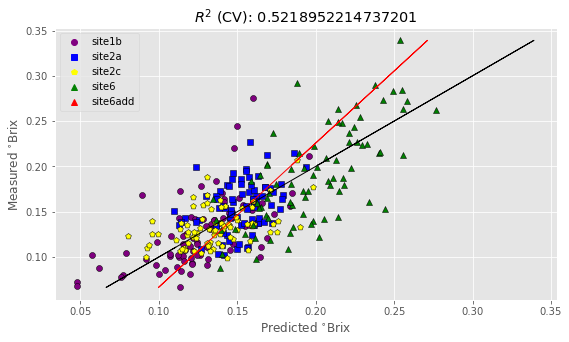

In [64]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:80,:]
x2_pc_std = opt_Xc_pc_std[80:160,:]
x3_pc_std = opt_Xc_pc_std[160:240,:]
x4_pc_std = opt_Xc_pc_std[240:550,:]

y1_pc_std = y_pc_std[0:80,:]
y2_pc_std = y_pc_std[80:160,:]
y3_pc_std = y_pc_std[160:240,:]
y4_pc_std = y_pc_std[240:550,:]
file_name_pc_std = 'E:/wenqu/model_csv_point/pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

In [110]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(57,) (57,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.0356126 ,  0.1109501 ,  0.0514523 , -0.03986235,  0.03202748,
       -0.06042146, -0.06209749, -0.04694605,  0.0878687 ,  0.11157972,
        0.03120066, -0.04543944,  0.01629225, -0.04673207,  0.04825787,
       -0.03277962,  0.08675246,  0.05090891, -0.08239047,  0.06222688,
       -0.00589016,  0.06663378, -0.06795888, -0.01886521, -0.06515342,
        0.05974236, -0.0226044 , -0.03250482, -0.02505986,  0.04533382,
       -0.04721446, -0.09716575,  0.06708856,  0.04174001, -0.06640455,
        0.0530302 , -0.15024912,  0.05378903, -0.04593089,  0.05847302,
        0.0590946 , -0.03915435,  0.09838703, -0.04083721, -0.05030338,
        0.03054938,  0.07895964, -0.09301361,  0.06019551, -0.15045665,
       -0.13695638, -0.11488656,  0.07654083,  0.07477061,  0.08824354,
        0.02915579, -0.07012366])

In [111]:
optimal_pls_sla.intercept_

array([0.15154764])

In [112]:
bands_sla

array(['band_25', 'band_256', 'band_125', 'band_93', 'band_219',
       'band_368', 'band_156', 'band_107', 'band_225', 'band_244',
       'band_380', 'band_82', 'band_379', 'band_274', 'band_71',
       'band_66', 'band_43', 'band_149', 'band_121', 'band_391',
       'band_152', 'band_56', 'band_157', 'band_154', 'band_47',
       'band_31', 'band_131', 'band_65', 'band_173', 'band_45',
       'band_143', 'band_51', 'band_140', 'band_138', 'band_36',
       'band_389', 'band_349', 'band_180', 'band_67', 'band_133',
       'band_381', 'band_29', 'band_277', 'band_169', 'band_23',
       'band_327', 'band_52', 'band_178', 'band_111', 'band_356',
       'band_224', 'band_384', 'band_118', 'band_116', 'band_50',
       'band_216', 'band_176'], dtype='<U8')